En el notebook anterior se entrenaron 12 modelos de regresión sobre la base de datos de 4000 nanopartículas. A continuación se realizan predicciones utilizando el set de testeo con el fin de realizar un scoring de todos los modelos y elegir los mas aptos


# Selección de mejores Modelos de Machine Learning para predicción Energía por Átomo de Nanopartículas de Oro 

Sobre los datos de evaluacion se deben realizar los mismos tratamientos que con los datos de entrenamiento, es decir la normalización, la reduccion de dimensionalidad y la clusterización. para luego predecir con los modelos correspondientes.

Se cargan los datos de evaluación

In [1]:
import warnings
warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning, ignore::FutureWarning')

In [5]:
from utils.path import *
from utils.librerias import * 
from utils.funciones import *
from utils.models import *
from utils.params import * 

Se carga el escaler, el PCA,y el modelo de clustering Kmeans

In [2]:
with open('utils/pickle/scaler.pkl',"rb") as file:
    scaler=pickle.load(file)
    file.close()
with open("utils/pickle/pca.pkl","rb") as file:
    pca=pickle.load(file)
    file.close()
with open("utils/pickle/kmeans3.pkl","rb") as file:
    kmeans=pickle.load(file)
    file.close()
with open("utils/pickle/columnas.pkl","rb") as file:
    columnas = pickle.load(file)
    file.close()

In [3]:
test=pd.read_csv("data/processed/test_clear.csv")

In [4]:
x_test=test.drop("E_atom", axis=1)

## Escalado

In [5]:
x_test_scaled=scaler.transform(x_test)

## PCA

In [6]:
x_test_scaled_pca = pca.transform(x_test_scaled)

## Cluster

In [7]:
cluster_label = kmeans.predict(x_test_scaled_pca)

## DataFrame

In [8]:
df_test_scaled_pca = pd.DataFrame(x_test_scaled_pca, columns=columnas[:-2])
df_test_scaled_pca_cluster = df_test_scaled_pca
df_test_scaled_pca_cluster["Cluster"] = cluster_label
df_test_scaled_pca_cluster["target"] = test["E_atom"]

In [17]:
df_test_scaled_pca_cluster

,Componente_0,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,...,Componente_18,Componente_19,Componente_20,Componente_21,Componente_22,Componente_23,Componente_24,Componente_25,Cluster,target
0,-7.061656,-2.166708,0.384561,2.100605,3.686815,-1.737083,2.818978,2.858436,-0.849986,-1.724752,...,0.702684,0.242273,-0.365776,0.578183,0.291355,-0.171300,-0.001552,-0.095948,0,-3.596243
1,-6.128535,2.821799,-1.108041,0.873632,-1.679890,2.719382,0.321821,0.532006,-0.393068,-0.726989,...,0.199910,-0.454396,0.192707,0.210409,0.202921,-0.061407,-0.099110,0.521805,0,-3.392015
2,-2.644286,-0.923696,-0.593353,-1.556880,-0.138868,0.766523,-0.814715,-0.717629,-0.187243,-0.213664,...,0.053870,0.107806,-0.936560,0.224583,0.196829,0.250221,0.138244,-0.043533,0,-3.519762
3,-3.410296,-2.763554,1.906475,-1.502436,0.637334,-0.414122,1.273470,-0.232250,0.282613,0.020077,...,-0.049835,-0.284498,0.224160,-0.075101,0.420983,-0.134215,0.105914,-0.043278,0,-3.644504
4,4.804696,-0.325270,-2.401202,-1.604092,0.821535,1.998977,0.037730,-2.356157,-0.587330,-0.595325,...,0.830439,-0.127192,-0.038017,0.212599,-0.384341,0.136322,0.445728,-0.442264,2,-3.551979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-4.793740,-2.893620,1.889157,-1.251941,1.112133,-2.039452,0.313273,0.318023,-0.539192,-0.183350,...,0.432542,-0.254212,0.745374,-0.208511,0.181040,-0.240047,-0.078035,0.013937,0,-3.675402
1196,-3.808974,-1.344018,-0.232809,-0.710096,0.786555,0.593904,0.212720,-0.605547,-0.185099,-0.016408,...,-0.033711,-0.034863,-0.262119,-0.093234,0.125548,0.270063,0.324162,-0.006164,0,-3.568032
1197,-6.633039,2.477017,-1.604412,0.692185,-1.563234,2.712483,0.343593,0.482351,-0.277519,-0.460416,...,-0.161386,-0.285383,-0.276102,0.222168,-0.076288,0.024719,0.023330,-0.015474,0,-3.383025
1198,9.694778,-3.147164,-0.823736,1.535629,-2.987091,-1.524428,1.078347,-0.668195,-1.218213,-1.073562,...,0.594443,0.783376,-0.118773,0.236609,-0.069459,0.044086,0.296766,0.386291,2,-3.719861


# Función de scoring

Comparación de best_score_ dado por el GridSearchCV de los modelos entrenados

Maximo score:0.988937022667772 es de Ridge_cluster_1


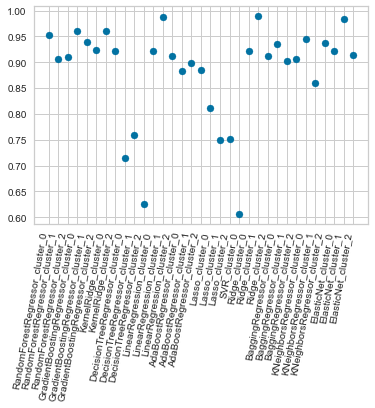

In [28]:
dir="utils/pickle/models"
best_scores = {}
models_saved = {}
for filename in os.listdir(dir):
    f = os.path.join(dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f ,"rb") as file:
            models=pickle.load(file)
            for key, value in models.items():
                if value.best_score_>0:
                    models_saved[f"{key}"] = value
                    best_scores[f"{key}"]=value.best_score_    

plt.scatter(best_scores.keys(), best_scores.values()) 
plt.xticks(rotation=80, ha='right')

print(f"Maximo score:{max(best_scores.values())} es de {get_key(best_scores, max(best_scores.values()))}" )

# Scoring de modelos entrenados con metricas de regresión

In [29]:
n_cluster=3
with open("utils/pickle/models/Lasso_entrenados.pkl","rb") as model:
            dict_modelos_entrenados=pickle.load(model)

In [32]:
dict_modelos_entrenados.keys()

dict_keys(['Lasso_cluster_0', 'Lasso_cluster_1', 'Lasso_cluster_2'])

In [38]:
dir= 'utils/pickle/models'
 
for file in os.listdir(dir):
    f = os.path.join(dir, file)
    if os.path.isfile(f):
        with open(f,"rb") as model:
            dict_modelos_entrenados=pickle.load(model)
            score(3, dict_modelos_entrenados, df_test_scaled_pca_cluster, "data/model_info/model_info.csv" )

****************************** 
Score de 
	 RandomForestRegressor() 

	R2 score cluster_0: 0.9505
	MAE score cluster_0: 0.0118
	MSE score cluster_0: 0.0004
	RMSE score cluster_0: 0.0192
	MAPE score cluster_0: 0.0033
..............................
File not exist
Model Info saved
****************************** 
Score de 
	 RandomForestRegressor() 

	R2 score cluster_1: 0.9042
	MAE score cluster_1: 0.0045
	MSE score cluster_1: 0.0
	RMSE score cluster_1: 0.0062
	MAPE score cluster_1: 0.0012
..............................
File exist
****************************** 
Score de 
	 RandomForestRegressor() 

	R2 score cluster_2: 0.911
	MAE score cluster_2: 0.0117
	MSE score cluster_2: 0.0004
	RMSE score cluster_2: 0.0198
	MAPE score cluster_2: 0.0032
..............................
File exist
****************************** 
Score de 
	 GradientBoostingRegressor() 

	R2 score cluster_0: 0.9558
	MAE score cluster_0: 0.0117
	MSE score cluster_0: 0.0003
	RMSE score cluster_0: 0.0181
	MAPE score cluster

# Elección de modelos

In [3]:
compare_model=pd.read_csv("data/model_info/model_info.csv")
compare_model

,model_name,cluster,hyper_parametros,best_score,R2,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),cluster_0,"{'bootstrap': True, 'max_depth': 100, 'min_sam...",0.9531,0.9505,0.0118,0.0004,0.0192,0.0033
1,RandomForestRegressor(),cluster_1,"{'bootstrap': True, 'max_depth': 50, 'min_samp...",0.9066,0.9042,0.0045,0.0000,0.0062,0.0012
2,RandomForestRegressor(),cluster_2,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.9100,0.9110,0.0117,0.0004,0.0198,0.0032
3,GradientBoostingRegressor(),cluster_0,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9595,0.9558,0.0117,0.0003,0.0181,0.0033
4,GradientBoostingRegressor(),cluster_1,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9386,0.9408,0.0037,0.0000,0.0049,0.0010
5,GradientBoostingRegressor(),cluster_2,"{'alpha': 0.9, 'learning_rate': 0.05, 'loss': ...",0.9240,0.9155,0.0113,0.0004,0.0193,0.0031
6,KernelRidge(),cluster_0,"{'alpha': 0.1, 'degree': 3, 'gamma': 0.01, 'ke...",0.9609,0.9627,0.0105,0.0003,0.0166,0.0030
7,KernelRidge(),cluster_1,"{'alpha': 0.1, 'degree': 1, 'gamma': 0.01, 'ke...",-0.7275,0.4893,0.0104,0.0002,0.0143,0.0029
8,KernelRidge(),cluster_2,"{'alpha': 0.1, 'degree': 2, 'gamma': 0.01, 'ke...",0.9221,0.9570,0.0099,0.0002,0.0138,0.0027
9,DecisionTreeRegressor(),cluster_0,"{'max_depth': 7, 'max_features': None, 'max_le...",0.7143,0.6909,0.0343,0.0023,0.0479,0.0096


In [4]:
compare_model.columns

Index(['model_name ', ' cluster', ' hyper_parametros', ' best_score', ' R2',
       '  MAE', ' MSE', ' RMSE', ' MAPE'],
      dtype='object')

In [33]:
compare_model[compare_model[' cluster']=='cluster_0']

,model_name,cluster,hyper_parametros,best_score,R2,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),cluster_0,"{'bootstrap': True, 'max_depth': 100, 'min_sam...",0.9531,0.9505,0.0118,0.0004,0.0192,0.0033
3,GradientBoostingRegressor(),cluster_0,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9595,0.9558,0.0117,0.0003,0.0181,0.0033
6,KernelRidge(),cluster_0,"{'alpha': 0.1, 'degree': 3, 'gamma': 0.01, 'ke...",0.9609,0.9627,0.0105,0.0003,0.0166,0.0030
9,DecisionTreeRegressor(),cluster_0,"{'max_depth': 7, 'max_features': None, 'max_le...",0.7143,0.6909,0.0343,0.0023,0.0479,0.0096
12,LinearRegression(),cluster_0,"{'copy_X': True, 'fit_intercept': True}",0.9222,0.9273,0.0164,0.0005,0.0233,0.0046
15,AdaBoostRegressor(),cluster_0,"{'learning_rate': 1.0, 'loss': 'square', 'n_es...",0.8824,0.8850,0.0237,0.0009,0.0292,0.0067
18,Lasso(),cluster_0,"{'alpha': 0.01, 'copy_X': False, 'fit_intercep...",0.8107,0.8216,0.0298,0.0013,0.0364,0.0084
21,SVR(),cluster_0,"{'C': 0.1, 'degree': 1, 'gamma': 100.0, 'kerne...",0.6065,0.6350,0.0458,0.0027,0.0521,0.0128
24,Ridge(),cluster_0,"{'alpha': 1.0, 'fit_intercept': True, 'max_ite...",0.9223,0.9273,0.0164,0.0005,0.0233,0.0046
27,BaggingRegressor(),cluster_0,"{'bootstrap': False, 'max_features': 8, 'max_s...",0.9357,0.9294,0.0159,0.0005,0.0229,0.0045


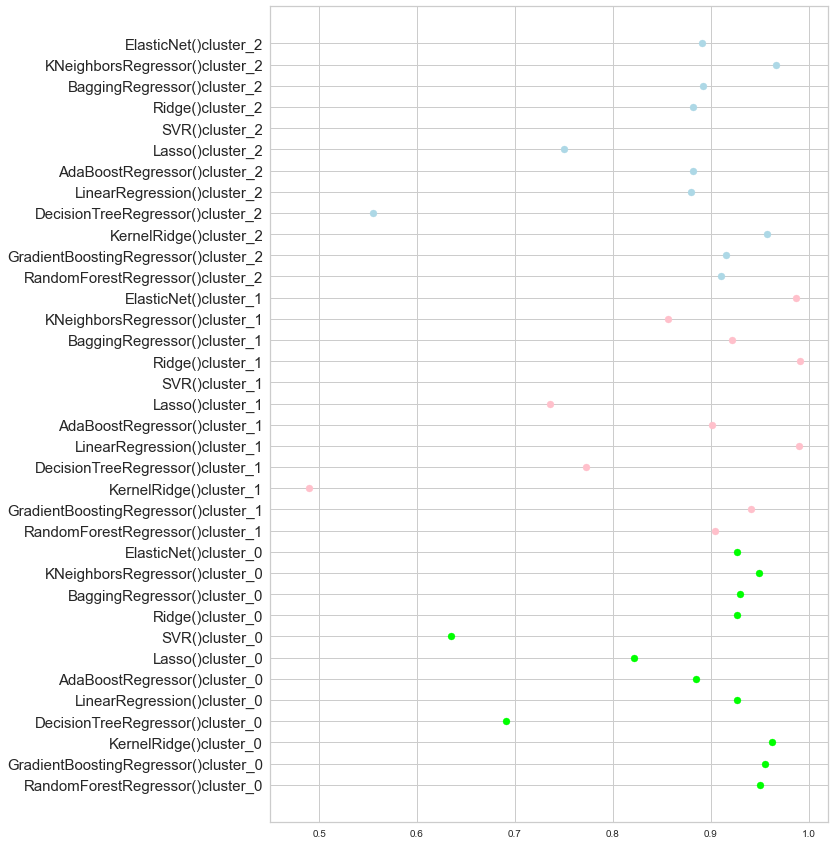

In [38]:
plt.figure(figsize=(10,15))
colors = ['lime', 'pink', 'lightblue']
for i in range(0,3):
    df = compare_model[compare_model[' cluster']==f'cluster_{i}']
    plt.scatter(df[' R2'], df['model_name ']+df[' cluster'], color=colors[i])
plt.xlim([0.45, 1.02])
plt.tick_params(axis='y', which='major', labelsize=15)

Ahora le quiero pegar el tiempo

In [46]:
times=pd.read_csv("data/model_info/times.csv")
times

,model_name,time
0,LinearRegression_cluster_0,1
1,LinearRegression_cluster_1,0
2,LinearRegression_cluster_2,0
3,Ridge_cluster_0,0
4,Ridge_cluster_1,0
5,Ridge_cluster_2,0
6,Lasso_cluster_0,3
7,Lasso_cluster_1,3
8,Lasso_cluster_2,2
9,ElasticNet_cluster_0,6


In [ ]:
times["model_name"]

In [47]:

df2 = times

In [55]:
df2["model"]=df2["model_name "].str.split('_', 1, expand=True).iloc[:,0]

In [57]:
df2["cluster"]=df2["model_name "].str.split('_', 1, expand=True).iloc[:,1]

In [58]:
df2=df2.drop("model_name ", axis=1)

In [59]:
df2

,time,model,cluster
0,1,LinearRegression,cluster_0
1,0,LinearRegression,cluster_1
2,0,LinearRegression,cluster_2
3,0,Ridge,cluster_0
4,0,Ridge,cluster_1
5,0,Ridge,cluster_2
6,3,Lasso,cluster_0
7,3,Lasso,cluster_1
8,2,Lasso,cluster_2
9,6,ElasticNet,cluster_0


In [81]:
df1 = compare_model

In [83]:
df1["model_name "] = df1["model_name "].str.rstrip('()')

In [84]:
df1

,model_name,cluster,hyper_parametros,best_score,R2,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor,cluster_0,"{'bootstrap': True, 'max_depth': 100, 'min_sam...",0.9531,0.9505,0.0118,0.0004,0.0192,0.0033
1,RandomForestRegressor,cluster_1,"{'bootstrap': True, 'max_depth': 50, 'min_samp...",0.9066,0.9042,0.0045,0.0000,0.0062,0.0012
2,RandomForestRegressor,cluster_2,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.9100,0.9110,0.0117,0.0004,0.0198,0.0032
3,GradientBoostingRegressor,cluster_0,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9595,0.9558,0.0117,0.0003,0.0181,0.0033
4,GradientBoostingRegressor,cluster_1,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9386,0.9408,0.0037,0.0000,0.0049,0.0010
5,GradientBoostingRegressor,cluster_2,"{'alpha': 0.9, 'learning_rate': 0.05, 'loss': ...",0.9240,0.9155,0.0113,0.0004,0.0193,0.0031
6,KernelRidge,cluster_0,"{'alpha': 0.1, 'degree': 3, 'gamma': 0.01, 'ke...",0.9609,0.9627,0.0105,0.0003,0.0166,0.0030
7,KernelRidge,cluster_1,"{'alpha': 0.1, 'degree': 1, 'gamma': 0.01, 'ke...",-0.7275,0.4893,0.0104,0.0002,0.0143,0.0029
8,KernelRidge,cluster_2,"{'alpha': 0.1, 'degree': 2, 'gamma': 0.01, 'ke...",0.9221,0.9570,0.0099,0.0002,0.0138,0.0027
9,DecisionTreeRegressor,cluster_0,"{'max_depth': 7, 'max_features': None, 'max_le...",0.7143,0.6909,0.0343,0.0023,0.0479,0.0096


In [93]:
df1.rename(columns = {'model_name ':'model', ' cluster':'cluster'}, inplace = True)

In [95]:
df3 = pd.merge(df1, df2, on=['model','cluster'],  how='left')

In [96]:
df3

,model,cluster,hyper_parametros,best_score,R2,MAE,MSE,RMSE,MAPE,time
0,RandomForestRegressor,cluster_0,"{'bootstrap': True, 'max_depth': 100, 'min_sam...",0.9531,0.9505,0.0118,0.0004,0.0192,0.0033,663
1,RandomForestRegressor,cluster_1,"{'bootstrap': True, 'max_depth': 50, 'min_samp...",0.9066,0.9042,0.0045,0.0000,0.0062,0.0012,35
2,RandomForestRegressor,cluster_2,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.9100,0.9110,0.0117,0.0004,0.0198,0.0032,118
3,GradientBoostingRegressor,cluster_0,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9595,0.9558,0.0117,0.0003,0.0181,0.0033,212
4,GradientBoostingRegressor,cluster_1,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9386,0.9408,0.0037,0.0000,0.0049,0.0010,19
5,GradientBoostingRegressor,cluster_2,"{'alpha': 0.9, 'learning_rate': 0.05, 'loss': ...",0.9240,0.9155,0.0113,0.0004,0.0193,0.0031,48
6,KernelRidge,cluster_0,"{'alpha': 0.1, 'degree': 3, 'gamma': 0.01, 'ke...",0.9609,0.9627,0.0105,0.0003,0.0166,0.0030,7
7,KernelRidge,cluster_1,"{'alpha': 0.1, 'degree': 1, 'gamma': 0.01, 'ke...",-0.7275,0.4893,0.0104,0.0002,0.0143,0.0029,0
8,KernelRidge,cluster_2,"{'alpha': 0.1, 'degree': 2, 'gamma': 0.01, 'ke...",0.9221,0.9570,0.0099,0.0002,0.0138,0.0027,0
9,DecisionTreeRegressor,cluster_0,"{'max_depth': 7, 'max_features': None, 'max_le...",0.7143,0.6909,0.0343,0.0023,0.0479,0.0096,38


In [99]:
df3.sort_values(" RMSE")

,model,cluster,hyper_parametros,best_score,R2,MAE,MSE,RMSE,MAPE,time
25,Ridge,cluster_1,"{'alpha': 0.1, 'fit_intercept': True, 'max_ite...",0.9889,0.9907,0.0014,0.0000,0.0019,0.0004,0
13,LinearRegression,cluster_1,"{'copy_X': True, 'fit_intercept': True}",0.9877,0.9906,0.0014,0.0000,0.0019,0.0004,0
34,ElasticNet,cluster_1,"{'alpha': 0.01, 'copy_X': True, 'fit_intercept...",0.9846,0.9871,0.0019,0.0000,0.0023,0.0005,1
4,GradientBoostingRegressor,cluster_1,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '...",0.9386,0.9408,0.0037,0.0000,0.0049,0.0010,19
28,BaggingRegressor,cluster_1,"{'bootstrap': False, 'max_features': 8, 'max_s...",0.9033,0.9214,0.0045,0.0000,0.0056,0.0013,5
1,RandomForestRegressor,cluster_1,"{'bootstrap': True, 'max_depth': 50, 'min_samp...",0.9066,0.9042,0.0045,0.0000,0.0062,0.0012,35
16,AdaBoostRegressor,cluster_1,"{'learning_rate': 1.0, 'loss': 'square', 'n_es...",0.8982,0.9012,0.0049,0.0000,0.0063,0.0013,18
31,KNeighborsRegressor,cluster_1,"{'algorithm': 'auto', 'leaf_size': 2, 'n_neigh...",0.8607,0.8562,0.0061,0.0001,0.0076,0.0017,0
10,DecisionTreeRegressor,cluster_1,"{'max_depth': 9, 'max_features': 'auto', 'max_...",0.7590,0.7724,0.0077,0.0001,0.0096,0.0021,19
19,Lasso,cluster_1,"{'alpha': 0.01, 'copy_X': True, 'fit_intercept...",0.7500,0.7354,0.0085,0.0001,0.0103,0.0023,3


# Se escogen los modelos para cada cluster

Ridge	cluster_1

KNeighborsRegressor	cluster_2

KernelRidge	cluster_0

Cluster_0

In [100]:
with open("utils/pickle/models/KernelRidge_entrenados.pkl","rb") as model:
        kernelRidge_entrenados=pickle.load(model)

kernelRidge_model_to_cluster_0=kernelRidge_entrenados["KernelRidge_cluster_0"]     

In [101]:
kernelRidge_model_to_cluster_0

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=KernelRidge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1], 'degree': [3, 2, 1],
                         'gamma': [0.01, 0.1],
                         'kernel': ['polynomial', 'rbf']},
             scoring='r2')

se guarda modelo y su información para posterior uso en aplicación

In [102]:
with open("my_models/kernelRidge_model_to_cluster_0.pkl", "wb") as file:
  pickle.dump(kernelRidge_model_to_cluster_0, file)

In [125]:
df3[(df3["model"]=="KernelRidge") & (df3["cluster"]=="cluster_0")].to_csv("my_models/kernelRidge_model_to_cluster_0_info.csv")

Cluster_1

In [103]:
with open("utils/pickle/models/Ridge_entrenados.pkl","rb") as model:
        ridge_entrenados=pickle.load(model)

ridge_model_to_cluster_1=ridge_entrenados["Ridge_cluster_1"]      

In [104]:
ridge_model_to_cluster_1

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 1000], 'random_state': [0, 1],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [105]:
with open("my_models/ridge_model_to_cluster_1.pkl", "wb") as file:
  pickle.dump(ridge_model_to_cluster_1, file)

In [126]:
df3[(df3["model"]=="Ridge") & (df3["cluster"]=="cluster_1")].to_csv("my_models/ridge_model_to_cluster_1_info.csv")

Cluster_2

In [106]:
with open("utils/pickle/models/KNeighborsRegressor_entrenados.pkl","rb") as model:
        kNeighborsRegressor_entrenados=pickle.load(model)

kNeighborsRegressor_model_to_cluster_2=kNeighborsRegressor_entrenados["KNeighborsRegressor_cluster_2"]     

In [107]:
kNeighborsRegressor_model_to_cluster_2

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [2, 5, 30],
                         'n_neighbors': [5, 6, 10, 14]},
             scoring='r2')

In [108]:
with open("my_models/kNeighborsRegressor_model_to_cluster_2.pkl", "wb") as file:
  pickle.dump(kNeighborsRegressor_model_to_cluster_2, file)

In [127]:
df3[(df3["model"]=="KNeighborsRegressor") & (df3["cluster"]=="cluster_2")].to_csv("my_models/kNeighborsRegressor_model_to_cluster_2_info.csv")

---
---
pruebo decitiontree para 2

In [102]:
with open("utils/pickle/models/DecisionTreeRegressor_entrenados.pkl","rb") as model:
        decisionTreeRegressor_entrenados=pickle.load(model)

decisionTreeRegressor_model_to_cluster_2=decisionTreeRegressor_entrenados["DecisionTreeRegressor_cluster_2"]     

---
---

una prediccion

In [111]:
with open('utils/pickle/kmeans3.pkl' ,"rb") as kmeans:
        knn3=pickle.load(kmeans)

In [112]:
y_input = df_test_scaled_pca_cluster[df_test_scaled_pca_cluster["Cluster"]==1].iloc[0,:].drop(["Cluster", "target"])
y_input = np.array(y_input).reshape(1, -1)
knn3.predict(y_input)

array([1], dtype=int32)

In [113]:
y_input

array([[ 2.93916209,  9.29450977,  1.76569953,  0.69042413, -3.44112497,
        -1.51882171, -0.92744   ,  0.64688175,  1.2004056 ,  1.98708631,
        -0.76797731, -1.44026666, -0.3135591 ,  0.04512264, -0.71678085,
        -0.19386342,  0.47332124, -0.2002666 ,  0.2670126 ,  0.57673397,
         0.59950272, -0.01027641,  0.30184266,  0.14913649, -0.03175327,
        -0.14480396]])

In [115]:
with open("my_models/ridge_model_to_cluster_1.pkl","rb") as model:
        ridge_predict=pickle.load(model)


In [116]:
ridge_predict.predict(y_input)

array([-3.60520045])

In [117]:
df_test_scaled_pca_cluster[df_test_scaled_pca_cluster["Cluster"]==1].iloc[0,:][ "target"]

-3.600423423423423

otra para 2

In [118]:
y_input = df_test_scaled_pca_cluster[df_test_scaled_pca_cluster["Cluster"]==2].iloc[0,:].drop(["Cluster", "target"])
y_input = np.array(y_input).reshape(1, -1)
knn3.predict(y_input)

array([2], dtype=int32)

In [119]:
kNeighborsRegressor_model_to_cluster_2.predict(y_input)

array([-3.55886225])

In [120]:
df_test_scaled_pca_cluster[df_test_scaled_pca_cluster["Cluster"]==2].iloc[0,:][ "target"]

-3.5519791300955723

Listos para productivización.

In [1]:
import pandas as pd

In [2]:
info = pd.read_csv("my_models/ridge_model_to_cluster_1_info.csv")

In [3]:
info.columns

Index(['Unnamed: 0', 'model', 'cluster', ' hyper_parametros', ' best_score',
       ' R2', '  MAE', ' MSE', ' RMSE', ' MAPE', ' time'],
      dtype='object')

In [5]:
info["model"][0]

'Ridge'